# **Trabalho Prático 1: Fraud Detection**
## Lara Gama Santos e Victor Samuel Levindo Mont'Mor



---

### 1. Leitura dos dados

Nessa etapa, precisamos fazer a leitura e análise dos dados. Temos as tabelas identity e transaction com uma relação de 1 para N, ou seja, uma identidade pode ter N transações. Para treinar o modelo, precisamos tratar esses dados. Dessa forma, aplicamos um Merge Left entre as tabelas, utilizando a chave `TransactionID` como união.

Algumas colunas (id) estão rotuladas incorretamente em test_identity, então tivemos que tratar os dados. Para isso, percorremos as colunas e aplicando a correção. 

In [1]:
import pandas as pd

# Carregar os dados de transação e identidade, e aplicar um merge para combinar os conjuntos de dados
df_train_transaction = pd.read_csv('data/train_transaction.csv')
df_train_identity = pd.read_csv('data/train_identity.csv')
df_train = df_train_transaction.merge(df_train_identity,on=['TransactionID'],how='left')
df_test_transaction = pd.read_csv('data/test_transaction.csv')
df_test_identity = pd.read_csv('data/test_identity.csv')

# Algumas colunas (id) estão rotuladas incorretamente em test_identity. Abaixo está a correção para isso
id_cols = [col for col in df_test_identity.columns if col[0]+col[1] == 'id']
rename_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}
df_test_identity = df_test_identity.rename(columns=rename_cols)
df_test = df_test_transaction.merge(df_test_identity,on=['TransactionID'],how='left')
df_train.to_csv('data/train_combined.csv',index=False)
df_test.to_csv('data/test_combined.csv',index=False)

### 2. Análise exploratória de dados:

- Extrair variáveis importantes e deixar para trás variáveis inúteis.
- Identificar outliers, valores ausentes ou erros humanos.
- Compreender as relações, ou a falta dela, entre as variáveis.
- Maximizar seus insights sobre um conjunto de dados e minimizar potenciais erros que possam ocorrer mais tarde no processo.

Entendendo o dado:
- .shape retorna o número de linhas pelo número de colunas do meu conjunto de dados.
- .columns retorna o nome de todas as suas colunas no conjunto de dados.
- .head() retorna as primeiras 5 linhas do meu conjunto de dados. Isso é útil se você quiser ver alguns valores de exemplo para cada variável.
- .info() retorna o tipo das colunas e a quantidade de valores não nulos que temos nelas.
- .describe() resume a contagem, média, desvio padrão, mínimo e máximo para variáveis numéricas.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('data/train_combined.csv')
# Para fins de teste rápido, amostramos 10% dos dados de treinamento
df_train = df_train.sample(frac=0.1, random_state=42) # Comentar essa linha para usar o conjunto completo

# Salve o arquivo de uma planilha com 1% dos dados de treinamento para testes rápidos
# df_train.sample(frac=0.01, random_state=42).to_csv('data/train_sample_one_percent.csv', index=False) 

df_test = pd.read_csv('data/test_combined.csv')

X_train = df_train.drop(columns=["TransactionID", "isFraud"])
y_train = df_train["isFraud"] 

X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

X_test_kaggle = df_test.drop(columns=["TransactionID"])

print(df_train.shape)
print(df_test.shape)

(59054, 434)
(506691, 433)


Nossa tabela tem 590540 linhas e 434 colunas

In [3]:
print(df_train.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


In [4]:
print(df_train.head())

        TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
470624        3457624        0       12153579         724.000         W   
565820        3552820        0       15005886         108.500         W   
284083        3271083        0        6970178          47.950         W   
239689        3226689        0        5673658         100.599         C   
281855        3268855        0        6886780         107.950         W   

        card1  card2  card3       card4  card5  ... id_31  id_32  id_33  \
470624   7826  481.0  150.0  mastercard  224.0  ...   NaN    NaN    NaN   
565820  12544  321.0  150.0        visa  226.0  ...   NaN    NaN    NaN   
284083   9400  111.0  150.0  mastercard  224.0  ...   NaN    NaN    NaN   
239689  15885  545.0  185.0        visa  138.0  ...   NaN    NaN    NaN   
281855  15497  490.0  150.0        visa  226.0  ...   NaN    NaN    NaN   

        id_34  id_35 id_36 id_37  id_38  DeviceType  DeviceInfo  
470624    NaN    NaN   NaN   NaN

In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59054 entries, 470624 to 579244
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 196.0+ MB
None


In [6]:
df_train.describe()
# df_train['nome_da_coluna_categorica'].value_counts()
# NA_val = df_cleaned.isna().sum() # conta quantos nulos tem nas colunas

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58150.000000,58897.000000,58603.000000,52513.000000,52513.000000,...,13920.000000,4548.000000,13913.000000,13906.000000,497.000000,498.000000,454.000000,494.000000,498.000000,7767.000000
mean,3.281903e+06,0.035713,7.361627e+06,135.235516,9895.574864,362.401273,153.201725,199.094278,290.156476,86.798355,...,189.506178,14.215259,353.733487,402.892421,369.418511,15.748996,12.790749,329.453441,149.616466,26.487447
std,1.701324e+05,0.185575,4.606494e+06,265.428753,4912.184523,157.903787,11.397095,41.423954,101.613678,2.658940,...,30.285754,1.535180,141.178729,152.405389,196.947251,6.502379,2.328972,99.071741,31.199486,3.740875
min,2.987002e+06,0.000000,8.646900e+04,0.350000,1007.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,11.000000,100.000000,100.000000,123.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135063e+06,0.000000,3.033211e+06,43.290750,6019.000000,210.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.281857e+06,0.000000,7.273272e+06,68.500000,9653.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,469.000000,252.000000,14.000000,11.000000,321.000000,159.000000,24.000000
75%,3.428169e+06,0.000000,1.120739e+07,125.000000,14259.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,500.000000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577512e+06,1.000000,1.581056e+07,31937.391000,18393.000000,600.000000,231.000000,237.000000,536.000000,102.000000,...,225.000000,28.000000,671.000000,660.000000,854.000000,41.000000,26.000000,548.000000,216.000000,32.000000


* Muitas Features: O conjunto de dados possui 434 colunas, o que é um número bem grande. Isso sugere que, no futuro, talvez precisemos de técnicas para selecionar as features mais importantes ou para reduzir a dimensionalidade.
* Valores Ausentes (Missing Values): Muitas colunas têm uma contagem de valores menor que o total de linhas (590.540), o que indica a presença de valores ausentes. Por exemplo, a coluna id_17 tem apenas 139.369 valores preenchidos. Lidar com esses valores ausentes será um passo crucial no pré-processamento dos dados.
* Dados Desbalanceados: A variável que queremos prever, isFraud, tem uma média de aproximadamente 0.035. Isso significa que apenas cerca de 3,5% das transações no conjunto de dados são fraudulentas. Este é um ponto muito importante, pois o desbalanceamento pode fazer com que o modelo de machine learning tenha uma tendência a prever que uma transação não é fraude, simplesmente porque essa é a classe majoritária.
* Diferentes Tipos e Escalas de Features: Existem features numéricas e categóricas (não numéricas). Além disso, as features numéricas estão em escalas muito diferentes. Por exemplo, TransactionAmt (valor da transação) chega a mais de 31.000, enquanto id_18 tem um valor máximo de 29. Será importante normalizar ou padronizar essas features.

#### 2.1 Análise de valores ausentes

In [7]:
import numpy as np
import seaborn as sns

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
id_24,58600,99.231212
id_25,58560,99.163477
id_07,58558,99.160091
id_08,58558,99.160091
id_21,58557,99.158397
id_23,58556,99.156704
id_27,58556,99.156704
id_26,58556,99.156704
id_22,58556,99.156704
dist2,55356,93.737935


#### 2.2 Visualização da distribuição da variável `isFraud`

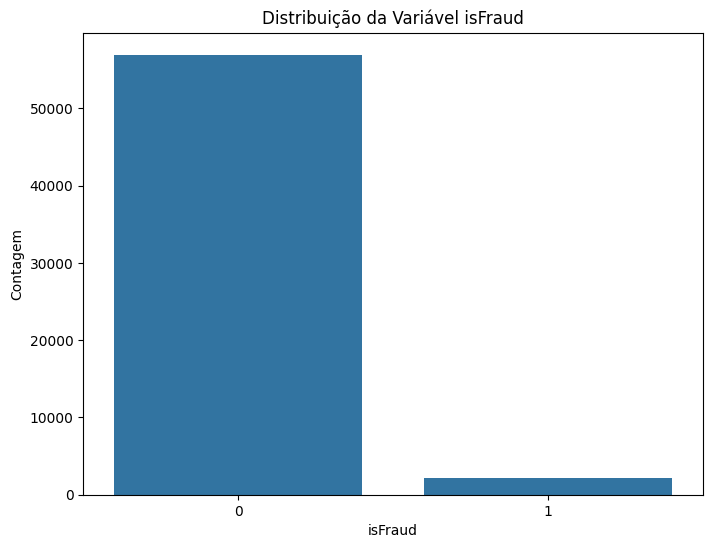

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df_train)
plt.title('Distribuição da Variável isFraud')
plt.xlabel('isFraud')
plt.ylabel('Contagem')
plt.show()

#### 2.3 Exploração das features categóricas

In [9]:
categorical_features = df_train.select_dtypes(include=['object']).columns
df_train[categorical_features].describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,59054,58895,58896,49496,13726,31948,31948,31948,30941,24052,...,7765,14004,7329,7784,14074,14074,14074,14074,14061,11793
unique,5,4,4,59,59,2,2,2,3,2,...,72,108,103,3,2,2,2,2,2,802
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,43972,38378,43916,22714,5710,31946,28617,25304,19779,13205,...,2160,2212,1703,6063,7787,13400,11056,7333,8557,4826


##### Transformando features categóricas em numéricas e preenchendo valores ausentes:

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Identifica colunas numéricas (números inteiros ou decimais)
numeric_features = X_train_local.select_dtypes(include=['int64', 'float64']).columns

# Identifica colunas categóricas (texto ou 'object')
categorical_features = X_train_local.select_dtypes(include=['object']).columns

# Preenche NaN numérico com a mediana (robusto a outliers)
numeric_imputer = SimpleImputer(strategy='median') 

# Preenche NaN categórico com o valor mais frequente
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Aplicar (note o .fit_transform em treino e só .transform em teste)
X_train_local[numeric_features] = numeric_imputer.fit_transform(X_train_local[numeric_features])
X_test_local[numeric_features] = numeric_imputer.transform(X_test_local[numeric_features])

X_train_local[categorical_features] = categorical_imputer.fit_transform(X_train_local[categorical_features])
X_test_local[categorical_features] = categorical_imputer.transform(X_test_local[categorical_features])


# O OrdinalEncoder transforma strings em números inteiros 
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Aplicar nos dados de treino e teste
X_train_local[categorical_features] = ordinal_encoder.fit_transform(X_train_local[categorical_features])
X_test_local[categorical_features] = ordinal_encoder.transform(X_test_local[categorical_features])

#### 2.4 Análise da correlação entre as features numéricas

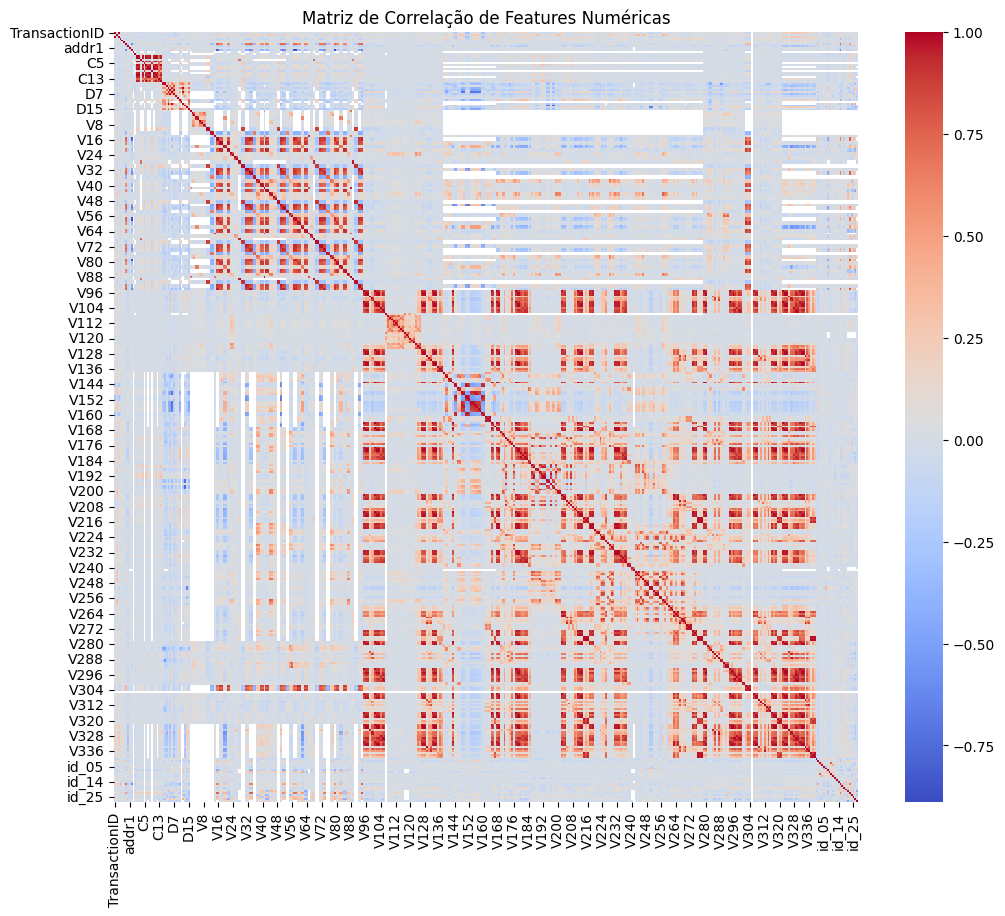

In [11]:
numerical_features = df_train.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação de Features Numéricas')
plt.show()

### 3. Métrica de avaliação

O dataset escolhido apresenta dados reais de transações bancárias de e-commerce da empresa Vesta Corporation. O objetivo do desafio é, dada uma série de atributos, determinar se uma transação é ou não fraudulenta, para melhorar a eficácia de alertas de transações fraudulentas.

O modelo é avaliado com base na área embaixo da curva ROC (Receiver Operating Characteristic). Trata-se de uma métrica de classificação caracterizada pela relação entre positivos verdadeiros e positivos falsos.

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\victo\AppData\Local\Temp\ipykernel_14308\2416281178.py:2: SyntaxWarning: invalid escape sequence '\C'
  display(Image(filename="imgs\Curva-ROC.webp"))


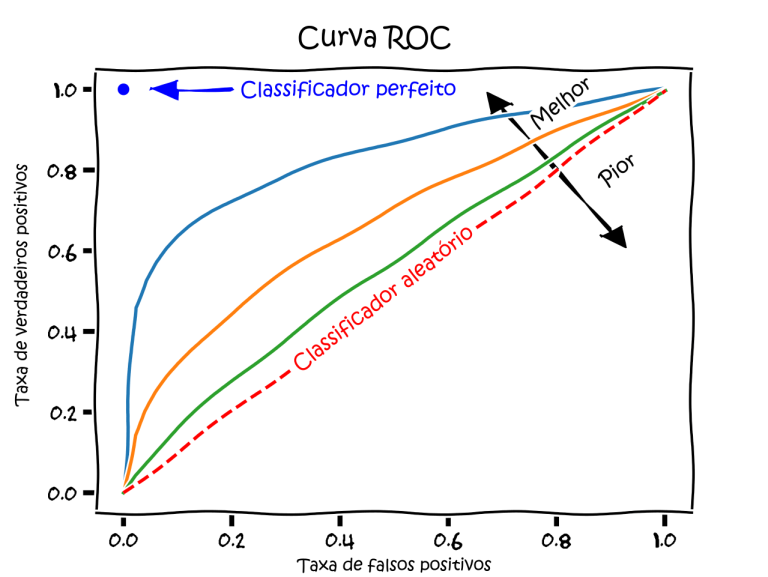

In [12]:
from IPython.display import Image, display
display(Image(filename="imgs\Curva-ROC.webp"))

A área embaixo da curva quantifica a capacidade do modelo de separar classes. Seu valor varia de 0 a 1, onde 1 indica uma classificação perfeita.

Essa métrica pode ser implementada em Python usando a função:

*roc_auc_score(y_test, y_pred_probs)*

(Deixamos a implementação de fato para depois da construção do baseline, para que possamos avaliá-lo com base nas classificações geradas)

### 4. Baseline

Como baseline, decidimos implementar uma árvore de decisão com profundidade máxima baixa, para que execute rapidamente

In [13]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0,max_depth=3)

classifier.fit(X_train_local, y_train_local) 

predictions_local = classifier.predict(X_test_local)

Métrica de avaliação:

A área sob a curva ROC (AUC) do modelo local é: 0.6622


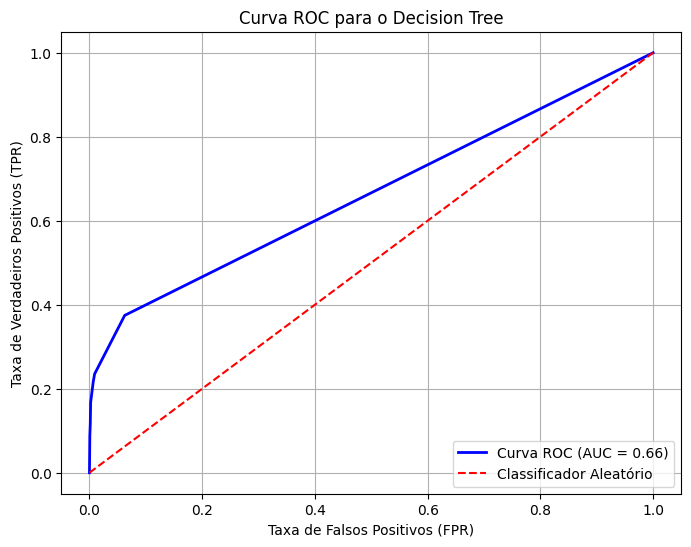

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculando a probabilidade da classe positiva (isFraud = 1), que é a segunda coluna [:, 1]
predictions_probs = classifier.predict_proba(X_test_local)[:, 1]

# Calculando a area embaixo da curva com base nas probabilidades
auc_score = roc_auc_score(y_test_local, predictions_probs)

print(f"A área sob a curva ROC (AUC) do modelo local é: {auc_score:.4f}")

# Vizualizacao grafica
fpr, tpr, thresholds = roc_curve(y_test_local, predictions_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para o Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 5. Soluções

#### 5.1 XGBoost com validação cruzada

Calculando scale pos weight e realizando pré processamento por meio de um pipeline. O objetivo do pré processamento é lidar com colunas NaN e categóricas, além de caracteres especiais.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Calcular scale_pos_weight para lidar com desbalanceamento
total_neg = (y_train == 0).sum()
total_pos = (y_train == 1).sum()
scale_pos_weight = total_neg / total_pos

numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='object').columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [16]:
import xgboost as xgb
from sklearn.model_selection import cross_validate, StratifiedKFold

# XGBoost
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic', # Objetivo para classificação binária
    eval_metric='auc',           # Métrica de avaliação interna
    scale_pos_weight=scale_pos_weight, # Para desbalanceamento
    random_state=42,
    n_estimators=200,            # Número de árvores (ajustável)
    learning_rate=0.1,           # Taxa de aprendizado (ajustável)
    max_depth=5,                 # Profundidade máxima (ajustável)
    subsample=0.8,               # Fração de amostras por árvore
    colsample_bytree=0.8         # Fração de features por árvore
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_val_results = cross_validate(
    xgb_pipeline,
    X_train,
    y_train,
    cv=cross_val,
    scoring='roc_auc',
    return_train_score=False
)
scores = cross_val_results['test_score']
mean_score = scores.mean()

print(f"Resultado da validação cruzada (AUC médio) com XGBoost: {mean_score:.4f}")

xgb_pipeline.fit(X_train, y_train)
predictions = xgb_pipeline.predict_proba(X_test_kaggle)[:, 1]

df_test["isFraud"] = predictions
df_test[["TransactionID", "isFraud"]].to_csv("xgboost.csv", index=False)
print("Arquivo 'xgboost.csv' salvo com sucesso.")

Resultado da validação cruzada (AUC médio) com XGBoost: 0.9002
Arquivo 'xgboost.csv' salvo com sucesso.


Resultado do XGBoost no Kaggle: 0.87

#### 5.2 LightGBM com validação cruzada

In [17]:
import lightgbm as lgb

# LightGBM
lgb_classifier = lgb.LGBMClassifier(
        n_estimators=50,
        max_depth=-1,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
        scale_pos_weight=scale_pos_weight,
        num_leaves=40,
        n_jobs=-1
)

lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb_classifier)
])

cross_val_results = cross_validate(
    lgb_pipeline,
    X_train,
    y_train,
    cv=cross_val,
    scoring='roc_auc',
    return_train_score=False
)
scores = cross_val_results['test_score']
mean_score = scores.mean()

print(f"Resultado da validação cruzada (AUC médio) com LightGBM: {mean_score:.4f}")

lgb_pipeline.fit(X_train, y_train)
predictions = lgb_pipeline.predict_proba(X_test_kaggle)[:, 1]

df_test["isFraud"] = predictions
df_test[["TransactionID", "isFraud"]].to_csv("lightgbm.csv", index=False)
print("Arquivo 'lightgbm.csv' salvo com sucesso.")

c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

Resultado da validação cruzada (AUC médio) com LightGBM: 0.8925


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Arquivo 'lightgbm.csv' salvo com sucesso.


Resultado da validação cruzada (AUC médio) com LightGBM: 0.89

Resultado do LightGBM no Kaggle: 0.87

#### 5.3 Random Forest com validação cruzada

Nesta seção implementamos um modelo Random Forest, usando um Pipeline que padroniza o pré‑processamento e validação cruzada para medir desempenho de forma robusta.

O que o Pipeline faz
- Pré‑processamento (preprocessor):
  - Numéricas: imputação de valores ausentes com a mediana.
  - Categóricas: imputação com o valor mais frequente e codificação ordinal (valores desconhecidos recebem código −1).
  - Esse passo é idêntico ao usado no XGBoost/LightGBM, garantindo consistência entre modelos.
- Classificador: RandomForestClassifier com class_weight='balanced_subsample', o que ajuda a lidar com o desbalanceamento (classe positiva rara).

Configuração do Random Forest
- n_estimators=400: número de árvores (aumentar pode melhorar AUC, mas deixa o treino mais lento).
- max_features='sqrt': fração de features testadas a cada divisão (boa prática em árvores de classificação).
- max_depth=None: profundidade livre (deixa as árvores crescerem até o critério de parada natural).
- min_samples_split=2 e min_samples_leaf=1: critérios mínimos para divisão/folha (podem ser aumentados para reduzir overfitting).
- random_state=42 e n_jobs=-1 para reprodutibilidade e uso de todos os núcleos.

Validação
- Usamos StratifiedKFold com 10 dobras (CV=10), preservando a proporção de classes em cada divisão.
- Métrica: ROC AUC (mais apropriada para dados desbalanceados do que acurácia).
- O código imprime o AUC médio nas dobras e, em seguida, treina em todo o conjunto de treino e gera um arquivo de submissão.

Possiveis melhorias a serem testadas
- Tuning rápido: ajustar n_estimators, max_depth, min_samples_leaf e max_features.
- Busca automática: RandomizedSearchCV ou HalvingGridSearchCV com a mesma métrica (roc_auc).
- Interpretabilidade: usar permutation importance para avaliar o impacto das features, reduzindo risco de viés da codificação.


In [18]:
# Random Forest com validação cruzada (AUC) e geração de submissão
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

# Reutiliza o preprocessor e o cross_val definidos nas seções anteriores
# preprocessor: imputação + codificação para numéricas/categóricas
# cross_val: StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=42,
)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf_clf),
])

cv_results = cross_validate(
    rf_pipeline,
    X_train,
    y_train,
    cv=cross_val,
    scoring="roc_auc",
    return_train_score=False,
)

rf_scores = cv_results["test_score"]
rf_mean_auc = float(np.mean(rf_scores))
print(f"Resultado da validação cruzada (AUC médio) com Random Forest: {rf_mean_auc:.4f}")

# Treino final em todo o conjunto e geração de submissão
rf_pipeline.fit(X_train, y_train)
preds_rf = rf_pipeline.predict_proba(X_test_kaggle)[:, 1]

_df_sub = df_test.copy()
_df_sub["isFraud"] = preds_rf
_df_sub[["TransactionID", "isFraud"]].to_csv("randomforest.csv", index=False)
print("Arquivo 'randomforest.csv' salvo com sucesso.")


Resultado da validação cruzada (AUC médio) com Random Forest: 0.8953
Arquivo 'randomforest.csv' salvo com sucesso.
Arquivo 'randomforest.csv' salvo com sucesso.


Resultado da validação cruzada com Random Forest: 0.89

Resultado do Random Forest no Kaggle: 0.89

#### 5.4 Meta-learning (Stacking): misturando métodos com Random Forest como meta-aprendiz

Nesta seção implementamos um ensemble de nível 2 (stacking) que combina XGBoost, LightGBM e Random Forest como modelos base, e usa um Random Forest como meta‑aprendiz para aprender a melhor combinação das previsões. Mantemos o mesmo pré‑processamento via Pipeline para evitar vazamento e garantir consistência.

Notas rápidas:
- O Stacking faz validação interna (cv=5) para gerar previsões out-of-fold dos modelos base; depois treina o meta‑aprendiz nessas previsões.
- A avaliação externa usa validação cruzada estratificada e métrica ROC AUC, como nas outras seções.
- Esse método costuma melhorar a robustez e capturar padrões complementares entre modelos distintos.

In [23]:
# Stacking (meta-learning) com Random Forest como meta-aprendiz
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np
import xgboost as xgb
import lightgbm as lgb

# Modelos base (diversos métodos)
base_estimators = [
    (
        "xgb",
        xgb.XGBClassifier(
            objective="binary:logistic",
            eval_metric="auc",
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            n_jobs=-1,
        ),
    ),
    (
        "lgb",
        lgb.LGBMClassifier(
            n_estimators=200,
            max_depth=-1,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            verbose=-1,
            scale_pos_weight=scale_pos_weight,
            num_leaves=40,
            n_jobs=-1,
        ),
    ),
    (
        "rf",
        RandomForestClassifier(
            n_estimators=300,
            max_depth=None,
            max_features="sqrt",
            min_samples_split=2,
            min_samples_leaf=1,
            n_jobs=-1,
            class_weight="balanced_subsample",
            random_state=42,
        ),
    ),
]

# Meta-aprendiz (nível 2): Random Forest
final_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    class_weight="balanced_subsample",
    random_state=42,
)

# StackingClassifier: gera previsões out-of-fold dos base learners e treina o meta-aprendiz
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_rf,
    stack_method="predict_proba",
    passthrough=False,  # use apenas as previsões dos modelos base como features para o meta-aprendiz
    n_jobs=-1,
    cv=5,
)

# Pipeline completo com pré-processamento
stack_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("stack", stack),
])

# Avaliação com validação cruzada externa (evita sobreajuste de avaliação)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_stack = cross_validate(
    stack_pipeline,
    X_train,
    y_train,
    cv=cv_outer,
    scoring="roc_auc",
    return_train_score=False,
)

stack_auc = float(np.mean(cv_results_stack["test_score"]))
print(f"AUC médio (Stacking com RF meta-aprendiz): {stack_auc:.4f}")

# Treino final e submissão
stack_pipeline.fit(X_train, y_train)
stack_preds = stack_pipeline.predict_proba(X_test_kaggle)[:, 1]

_df_sub = df_test.copy()
_df_sub["isFraud"] = stack_preds
_df_sub[["TransactionID", "isFraud"]].to_csv("stacking_rf_meta.csv", index=False)
print("Arquivo 'stacking_rf_meta.csv' salvo com sucesso.")

c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

AUC médio (Stacking com RF meta-aprendiz): 0.8674


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Arquivo 'stacking_rf_meta.csv' salvo com sucesso.


### 6. Avaliação de parâmetros

Nesta seção realizamos **hyperparameter tuning** (otimização de hiperparâmetros) para os três modelos implementados: XGBoost, LightGBM e Random Forest.

**Por que fazer tuning?**
- Hiperparâmetros padrão raramente são ótimos para um problema específico
- Tuning pode melhorar significativamente o AUC
- Encontra equilíbrio entre bias e variância

**Ferramenta: Optuna**
- Biblioteca de otimização bayesiana (mais eficiente que GridSearchCV)
- Usa TPE (Tree-structured Parzen Estimator) para exploração inteligente do espaço de busca
- Suporta pruning: interrompe trials ruins precocemente, economizando tempo
- Define espaços de busca complexos (log-uniform, categorical, etc.)

**Estratégia**
1. Espaço de busca por modelo (ranges baseados em literatura)
2. Validação cruzada estratificada (CV=5 para velocidade)
3. Otimização de ROC AUC (métrica do Kaggle)
4. 50 trials por modelo (balanço qualidade/tempo)
5. Comparação de hiperparâmetros e AUCs default vs otimizados

**Nota sobre tempo:** Cada trial leva ~5-10 min (com 10% dos dados), totalizando ~4-8h por modelo. Para testes rápidos, reduza `n_trials` ou use `frac=0.01` no sampling inicial.

#### 6.1 Hyperparameter Tuning - XGBoost

Otimizamos: `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `min_child_weight`, `gamma`

In [20]:
try:
    import optuna
except ImportError:
    raise ImportError("Optuna não instalado. Execute: pip install optuna")

from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb

def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
    }
    
    xgb_clf = xgb.XGBClassifier(**params)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb_clf)
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1)
    
    return scores.mean()

print("Otimizando XGBoost (pode levar várias horas)...\n")

study_xgb = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
)

study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)

print(f"\n✓ Melhor AUC (XGBoost): {study_xgb.best_value:.4f}")
print("\nMelhores hiperparâmetros:")
for key, value in study_xgb.best_params.items():
    print(f"  {key}: {value}")

c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-27 14:11:07,055] A new study created in memory with name: no-name-be33b74f-ccd2-4a46-8aa0-6eccedc7bde1


Otimizando XGBoost (pode levar várias horas)...



Best trial: 0. Best value: 0.900685:   2%|▏         | 1/50 [00:40<32:41, 40.04s/it]

[I 2025-10-27 14:11:47,090] Trial 0 finished with value: 0.9006847819133824 and parameters: {'n_estimators': 218, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:   4%|▍         | 2/50 [01:25<34:36, 43.26s/it]

[I 2025-10-27 14:12:32,614] Trial 1 finished with value: 0.896383628912875 and parameters: {'n_estimators': 440, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'subsample': 0.608233797718321, 'colsample_bytree': 0.9879639408647978, 'min_child_weight': 9, 'gamma': 1.0616955533913808}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:   6%|▌         | 3/50 [01:44<25:12, 32.18s/it]

[I 2025-10-27 14:12:51,613] Trial 2 finished with value: 0.8788819702455773 and parameters: {'n_estimators': 132, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'min_child_weight': 3, 'gamma': 3.0592644736118975}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:   8%|▊         | 4/50 [02:01<20:09, 26.29s/it]

[I 2025-10-27 14:13:08,859] Trial 3 finished with value: 0.8862267527669093 and parameters: {'n_estimators': 112, 'max_depth': 5, 'learning_rate': 0.03476649150592621, 'subsample': 0.7824279936868144, 'colsample_bytree': 0.9140703845572055, 'min_child_weight': 2, 'gamma': 2.571172192068058}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  10%|█         | 5/50 [02:29<20:09, 26.87s/it]

[I 2025-10-27 14:13:36,774] Trial 4 finished with value: 0.8930443216159011 and parameters: {'n_estimators': 317, 'max_depth': 3, 'learning_rate': 0.07896186801026692, 'subsample': 0.6682096494749166, 'colsample_bytree': 0.6260206371941118, 'min_child_weight': 10, 'gamma': 4.828160165372797}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  12%|█▏        | 6/50 [03:07<22:21, 30.49s/it]

[I 2025-10-27 14:14:14,279] Trial 5 finished with value: 0.8919170354469008 and parameters: {'n_estimators': 414, 'max_depth': 5, 'learning_rate': 0.013940346079873234, 'subsample': 0.8736932106048627, 'colsample_bytree': 0.7760609974958406, 'min_child_weight': 2, 'gamma': 2.475884550556351}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  14%|█▍        | 7/50 [03:31<20:19, 28.36s/it]

[I 2025-10-27 14:14:38,262] Trial 6 finished with value: 0.8834648039357829 and parameters: {'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.024112898115291985, 'subsample': 0.8650089137415928, 'colsample_bytree': 0.7246844304357644, 'min_child_weight': 6, 'gamma': 2.7335513967163982}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  16%|█▌        | 8/50 [03:56<19:11, 27.41s/it]

[I 2025-10-27 14:15:03,646] Trial 7 finished with value: 0.8942348419813619 and parameters: {'n_estimators': 133, 'max_depth': 10, 'learning_rate': 0.13962563737015762, 'subsample': 0.9757995766256756, 'colsample_bytree': 0.9579309401710595, 'min_child_weight': 6, 'gamma': 4.609371175115584}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  18%|█▊        | 9/50 [04:12<16:19, 23.88s/it]

[I 2025-10-27 14:15:19,756] Trial 8 finished with value: 0.8621538342072688 and parameters: {'n_estimators': 89, 'max_depth': 4, 'learning_rate': 0.011662890273931383, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'min_child_weight': 3, 'gamma': 4.143687545759647}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  20%|██        | 10/50 [04:36<15:50, 23.76s/it]

[I 2025-10-27 14:15:43,233] Trial 9 finished with value: 0.8985228111829956 and parameters: {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.06333268775321843, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'min_child_weight': 1, 'gamma': 4.9344346830025865}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  22%|██▏       | 11/50 [05:11<17:43, 27.26s/it]

[I 2025-10-27 14:16:18,451] Trial 10 finished with value: 0.8920079638250396 and parameters: {'n_estimators': 291, 'max_depth': 8, 'learning_rate': 0.2704729722717776, 'subsample': 0.9729161367647149, 'colsample_bytree': 0.6061470949312417, 'min_child_weight': 5, 'gamma': 0.0757211855137844}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  24%|██▍       | 12/50 [05:46<18:42, 29.55s/it]

[I 2025-10-27 14:16:53,219] Trial 11 finished with value: 0.8972123318388192 and parameters: {'n_estimators': 209, 'max_depth': 8, 'learning_rate': 0.05995705842085316, 'subsample': 0.7114516496119322, 'colsample_bytree': 0.8788623593360378, 'min_child_weight': 1, 'gamma': 1.2266902104926625}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  26%|██▌       | 13/50 [06:13<17:51, 28.96s/it]

[I 2025-10-27 14:17:20,837] Trial 12 finished with value: 0.8898296464887887 and parameters: {'n_estimators': 204, 'max_depth': 6, 'learning_rate': 0.18963242937653543, 'subsample': 0.6032661729295585, 'colsample_bytree': 0.6809844258025741, 'min_child_weight': 1, 'gamma': 3.7286895566903766}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  28%|██▊       | 14/50 [06:46<18:01, 30.04s/it]

[I 2025-10-27 14:17:53,374] Trial 13 finished with value: 0.8983539626294101 and parameters: {'n_estimators': 205, 'max_depth': 9, 'learning_rate': 0.09206387984645215, 'subsample': 0.8804650381575039, 'colsample_bytree': 0.8491835199736807, 'min_child_weight': 4, 'gamma': 1.7139964413315822}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 0. Best value: 0.900685:  30%|███       | 15/50 [07:18<17:56, 30.76s/it]

[I 2025-10-27 14:18:25,799] Trial 14 finished with value: 0.9001683008595567 and parameters: {'n_estimators': 343, 'max_depth': 6, 'learning_rate': 0.047076880655607035, 'subsample': 0.7818047313594463, 'colsample_bytree': 0.8332908615865308, 'min_child_weight': 1, 'gamma': 0.24094571206617188}. Best is trial 0 with value: 0.9006847819133824.


Best trial: 15. Best value: 0.900954:  32%|███▏      | 16/50 [07:57<18:52, 33.31s/it]

[I 2025-10-27 14:19:05,037] Trial 15 finished with value: 0.900953941354843 and parameters: {'n_estimators': 359, 'max_depth': 7, 'learning_rate': 0.041655873502981104, 'subsample': 0.8199697743290097, 'colsample_bytree': 0.8413568102563377, 'min_child_weight': 8, 'gamma': 0.11441246482305428}. Best is trial 15 with value: 0.900953941354843.


Best trial: 15. Best value: 0.900954:  34%|███▍      | 17/50 [08:46<20:46, 37.78s/it]

[I 2025-10-27 14:19:53,205] Trial 16 finished with value: 0.9005420928911431 and parameters: {'n_estimators': 383, 'max_depth': 8, 'learning_rate': 0.019162913807723413, 'subsample': 0.92012278111992, 'colsample_bytree': 0.6772876502180768, 'min_child_weight': 8, 'gamma': 0.7689596058375274}. Best is trial 15 with value: 0.900953941354843.


Best trial: 15. Best value: 0.900954:  36%|███▌      | 18/50 [09:29<21:00, 39.40s/it]

[I 2025-10-27 14:20:36,394] Trial 17 finished with value: 0.899803297483578 and parameters: {'n_estimators': 264, 'max_depth': 9, 'learning_rate': 0.04188951375785217, 'subsample': 0.843703982484205, 'colsample_bytree': 0.8202907047327793, 'min_child_weight': 7, 'gamma': 1.9472432274086078}. Best is trial 15 with value: 0.900953941354843.


Best trial: 15. Best value: 0.900954:  38%|███▊      | 19/50 [10:15<21:20, 41.30s/it]

[I 2025-10-27 14:21:22,101] Trial 18 finished with value: 0.8969298651918807 and parameters: {'n_estimators': 487, 'max_depth': 7, 'learning_rate': 0.15526074257939748, 'subsample': 0.9289067562648595, 'colsample_bytree': 0.6998817573703753, 'min_child_weight': 8, 'gamma': 0.4891359943786182}. Best is trial 15 with value: 0.900953941354843.


Best trial: 15. Best value: 0.900954:  40%|████      | 20/50 [10:46<19:11, 38.38s/it]

[I 2025-10-27 14:21:53,678] Trial 19 finished with value: 0.896081757775878 and parameters: {'n_estimators': 253, 'max_depth': 9, 'learning_rate': 0.2379065672149586, 'subsample': 0.8079931219615357, 'colsample_bytree': 0.6451180989979339, 'min_child_weight': 10, 'gamma': 1.601698676289585}. Best is trial 15 with value: 0.900953941354843.


Best trial: 20. Best value: 0.904914:  42%|████▏     | 21/50 [11:40<20:45, 42.96s/it]

[I 2025-10-27 14:22:47,320] Trial 20 finished with value: 0.9049138429205164 and parameters: {'n_estimators': 356, 'max_depth': 10, 'learning_rate': 0.10464320606733941, 'subsample': 0.7442716788022226, 'colsample_bytree': 0.7337501416644183, 'min_child_weight': 5, 'gamma': 0.03229611095067722}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  44%|████▍     | 22/50 [12:33<21:27, 46.00s/it]

[I 2025-10-27 14:23:40,399] Trial 21 finished with value: 0.9021536940367396 and parameters: {'n_estimators': 369, 'max_depth': 10, 'learning_rate': 0.11557253369542381, 'subsample': 0.7588809902885031, 'colsample_bytree': 0.7183298933818462, 'min_child_weight': 5, 'gamma': 0.57886957317117}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  46%|████▌     | 23/50 [13:22<21:06, 46.92s/it]

[I 2025-10-27 14:24:29,462] Trial 22 finished with value: 0.904629774359974 and parameters: {'n_estimators': 354, 'max_depth': 9, 'learning_rate': 0.08884650712377959, 'subsample': 0.7558127972418259, 'colsample_bytree': 0.7273700650782612, 'min_child_weight': 5, 'gamma': 0.7577391557009641}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  48%|████▊     | 24/50 [14:24<22:19, 51.52s/it]

[I 2025-10-27 14:25:31,724] Trial 23 finished with value: 0.902918770454799 and parameters: {'n_estimators': 439, 'max_depth': 10, 'learning_rate': 0.07851725528116818, 'subsample': 0.7335425081660536, 'colsample_bytree': 0.7274970383984626, 'min_child_weight': 5, 'gamma': 0.8271086251896149}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  50%|█████     | 25/50 [15:28<22:59, 55.19s/it]

[I 2025-10-27 14:26:35,466] Trial 24 finished with value: 0.9047061259322102 and parameters: {'n_estimators': 498, 'max_depth': 9, 'learning_rate': 0.07741101386319924, 'subsample': 0.7117481245295891, 'colsample_bytree': 0.7317693170267946, 'min_child_weight': 4, 'gamma': 0.983197738762465}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  52%|█████▏    | 26/50 [16:29<22:48, 57.01s/it]

[I 2025-10-27 14:27:36,716] Trial 25 finished with value: 0.9038094397065473 and parameters: {'n_estimators': 487, 'max_depth': 9, 'learning_rate': 0.08268192466163322, 'subsample': 0.6853550910382817, 'colsample_bytree': 0.7924514576483054, 'min_child_weight': 4, 'gamma': 1.2599267598013184}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  54%|█████▍    | 27/50 [17:13<20:19, 53.03s/it]

[I 2025-10-27 14:28:20,469] Trial 26 finished with value: 0.896729052795677 and parameters: {'n_estimators': 410, 'max_depth': 8, 'learning_rate': 0.18978687399994656, 'subsample': 0.7024943536618692, 'colsample_bytree': 0.7461087814572279, 'min_child_weight': 4, 'gamma': 0.9624602780117866}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  56%|█████▌    | 28/50 [18:00<18:49, 51.35s/it]

[I 2025-10-27 14:29:07,899] Trial 27 finished with value: 0.9017641583470558 and parameters: {'n_estimators': 322, 'max_depth': 9, 'learning_rate': 0.05354067223562659, 'subsample': 0.7544114406875858, 'colsample_bytree': 0.6952431526719448, 'min_child_weight': 6, 'gamma': 1.4885517349796786}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  58%|█████▊    | 29/50 [18:56<18:27, 52.76s/it]

[I 2025-10-27 14:30:03,953] Trial 28 finished with value: 0.9046781383818481 and parameters: {'n_estimators': 402, 'max_depth': 9, 'learning_rate': 0.07319430117834765, 'subsample': 0.638036810732299, 'colsample_bytree': 0.8097479064116585, 'min_child_weight': 7, 'gamma': 0.5318867811481958}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  60%|██████    | 30/50 [19:51<17:44, 53.22s/it]

[I 2025-10-27 14:30:58,255] Trial 29 finished with value: 0.8989807997797488 and parameters: {'n_estimators': 466, 'max_depth': 10, 'learning_rate': 0.10397164211500186, 'subsample': 0.6353498710296395, 'colsample_bytree': 0.8089412711855998, 'min_child_weight': 7, 'gamma': 2.2012199008004876}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  62%|██████▏   | 31/50 [20:42<16:38, 52.57s/it]

[I 2025-10-27 14:31:49,306] Trial 30 finished with value: 0.903292135431332 and parameters: {'n_estimators': 397, 'max_depth': 8, 'learning_rate': 0.06091628215775471, 'subsample': 0.6350617118411683, 'colsample_bytree': 0.8698157456763208, 'min_child_weight': 7, 'gamma': 0.38538226071784587}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 20. Best value: 0.904914:  64%|██████▍   | 32/50 [21:37<16:00, 53.33s/it]

[I 2025-10-27 14:32:44,418] Trial 31 finished with value: 0.9025829782671956 and parameters: {'n_estimators': 439, 'max_depth': 9, 'learning_rate': 0.13448185080710923, 'subsample': 0.6894960919947463, 'colsample_bytree': 0.7513430628907286, 'min_child_weight': 3, 'gamma': 0.5905770265139633}. Best is trial 20 with value: 0.9049138429205164.


Best trial: 32. Best value: 0.905596:  66%|██████▌   | 33/50 [22:33<15:19, 54.11s/it]

[I 2025-10-27 14:33:40,335] Trial 32 finished with value: 0.9055955550884368 and parameters: {'n_estimators': 335, 'max_depth': 10, 'learning_rate': 0.09560582037329111, 'subsample': 0.745589225284701, 'colsample_bytree': 0.7801835944852071, 'min_child_weight': 4, 'gamma': 0.013722977101088052}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  68%|██████▊   | 34/50 [23:27<14:27, 54.24s/it]

[I 2025-10-27 14:34:34,873] Trial 33 finished with value: 0.9019152769250282 and parameters: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.0677608838821341, 'subsample': 0.7242648806740052, 'colsample_bytree': 0.7853971938053215, 'min_child_weight': 4, 'gamma': 0.05769745106535901}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  70%|███████   | 35/50 [24:33<14:25, 57.72s/it]

[I 2025-10-27 14:35:40,723] Trial 34 finished with value: 0.9026609416374247 and parameters: {'n_estimators': 461, 'max_depth': 10, 'learning_rate': 0.10484144371093403, 'subsample': 0.6627382483743899, 'colsample_bytree': 0.7666706745405582, 'min_child_weight': 4, 'gamma': 0.38307455649524513}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  72%|███████▏  | 36/50 [25:17<12:30, 53.61s/it]

[I 2025-10-27 14:36:24,754] Trial 35 finished with value: 0.8985876853973818 and parameters: {'n_estimators': 337, 'max_depth': 10, 'learning_rate': 0.18017356103013618, 'subsample': 0.6369663385017454, 'colsample_bytree': 0.8074083123364091, 'min_child_weight': 3, 'gamma': 1.0629366825221762}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  74%|███████▍  | 37/50 [26:18<12:04, 55.75s/it]

[I 2025-10-27 14:37:25,502] Trial 36 finished with value: 0.9020124823847946 and parameters: {'n_estimators': 416, 'max_depth': 9, 'learning_rate': 0.030926589591793313, 'subsample': 0.7876843474958887, 'colsample_bytree': 0.7455071789291808, 'min_child_weight': 6, 'gamma': 0.05646682925006036}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  76%|███████▌  | 38/50 [27:05<10:37, 53.12s/it]

[I 2025-10-27 14:38:12,465] Trial 37 finished with value: 0.898777480702338 and parameters: {'n_estimators': 382, 'max_depth': 8, 'learning_rate': 0.12306181701436159, 'subsample': 0.6829301392693443, 'colsample_bytree': 0.6534935482462926, 'min_child_weight': 2, 'gamma': 1.228533447099877}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  78%|███████▊  | 39/50 [27:52<09:23, 51.26s/it]

[I 2025-10-27 14:38:59,381] Trial 38 finished with value: 0.9042660894133048 and parameters: {'n_estimators': 314, 'max_depth': 10, 'learning_rate': 0.07367029657765889, 'subsample': 0.7451697877082577, 'colsample_bytree': 0.7776985439756204, 'min_child_weight': 9, 'gamma': 3.0029094746249876}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  80%|████████  | 40/50 [28:14<07:06, 42.63s/it]

[I 2025-10-27 14:39:21,889] Trial 39 finished with value: 0.8890220072959665 and parameters: {'n_estimators': 241, 'max_depth': 3, 'learning_rate': 0.05099023856106698, 'subsample': 0.7083607060225643, 'colsample_bytree': 0.7066981926327961, 'min_child_weight': 5, 'gamma': 0.6030475894069478}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  82%|████████▏ | 41/50 [28:49<06:01, 40.14s/it]

[I 2025-10-27 14:39:56,198] Trial 40 finished with value: 0.899747098204897 and parameters: {'n_estimators': 283, 'max_depth': 7, 'learning_rate': 0.09696093613345028, 'subsample': 0.7779097337715812, 'colsample_bytree': 0.8700187060215155, 'min_child_weight': 7, 'gamma': 3.689352734265006}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  84%|████████▍ | 42/50 [29:43<05:54, 44.32s/it]

[I 2025-10-27 14:40:50,278] Trial 41 finished with value: 0.903181458536954 and parameters: {'n_estimators': 354, 'max_depth': 9, 'learning_rate': 0.0851357569543236, 'subsample': 0.7650723155381586, 'colsample_bytree': 0.7309198675623518, 'min_child_weight': 5, 'gamma': 0.353885239247482}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  86%|████████▌ | 43/50 [30:30<05:15, 45.10s/it]

[I 2025-10-27 14:41:37,206] Trial 42 finished with value: 0.900371430156687 and parameters: {'n_estimators': 328, 'max_depth': 9, 'learning_rate': 0.15017276464719098, 'subsample': 0.7351171989067137, 'colsample_bytree': 0.7647519077524341, 'min_child_weight': 6, 'gamma': 0.7760201401715332}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  88%|████████▊ | 44/50 [31:31<04:59, 49.87s/it]

[I 2025-10-27 14:42:38,206] Trial 43 finished with value: 0.9031108773725336 and parameters: {'n_estimators': 420, 'max_depth': 9, 'learning_rate': 0.07039344816110443, 'subsample': 0.8277995504259237, 'colsample_bytree': 0.733783637099091, 'min_child_weight': 4, 'gamma': 0.9351382254690626}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  90%|█████████ | 45/50 [32:27<04:19, 51.92s/it]

[I 2025-10-27 14:43:34,892] Trial 44 finished with value: 0.9027239368293444 and parameters: {'n_estimators': 379, 'max_depth': 10, 'learning_rate': 0.11883835996693959, 'subsample': 0.7950607781137817, 'colsample_bytree': 0.9994563730237144, 'min_child_weight': 5, 'gamma': 0.30549562901836247}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  92%|█████████▏| 46/50 [33:24<03:33, 53.47s/it]

[I 2025-10-27 14:44:32,000] Trial 45 finished with value: 0.9024723118996925 and parameters: {'n_estimators': 463, 'max_depth': 8, 'learning_rate': 0.0918593846924521, 'subsample': 0.7158266763519404, 'colsample_bytree': 0.6763290166647573, 'min_child_weight': 3, 'gamma': 0.021780632599144804}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  94%|█████████▍| 47/50 [34:01<02:25, 48.50s/it]

[I 2025-10-27 14:45:08,894] Trial 46 finished with value: 0.8999616079434372 and parameters: {'n_estimators': 174, 'max_depth': 10, 'learning_rate': 0.059355130088661195, 'subsample': 0.6169612157954634, 'colsample_bytree': 0.795643272262108, 'min_child_weight': 6, 'gamma': 1.373982609710553}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  96%|█████████▌| 48/50 [34:53<01:38, 49.36s/it]

[I 2025-10-27 14:46:00,273] Trial 47 finished with value: 0.89969501419299 and parameters: {'n_estimators': 304, 'max_depth': 9, 'learning_rate': 0.040284821443384244, 'subsample': 0.7659166454289277, 'colsample_bytree': 0.90026802737786, 'min_child_weight': 2, 'gamma': 1.873212654129893}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596:  98%|█████████▊| 49/50 [35:51<00:52, 52.15s/it]

[I 2025-10-27 14:46:58,928] Trial 48 finished with value: 0.9021017898218796 and parameters: {'n_estimators': 350, 'max_depth': 10, 'learning_rate': 0.07670670028315826, 'subsample': 0.6710559300757173, 'colsample_bytree': 0.7117742323210181, 'min_child_weight': 3, 'gamma': 0.6843883664952163}. Best is trial 32 with value: 0.9055955550884368.


Best trial: 32. Best value: 0.905596: 100%|██████████| 50/50 [36:40<00:00, 44.02s/it]

[I 2025-10-27 14:47:47,830] Trial 49 finished with value: 0.8952399508180845 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.16175163147202573, 'subsample': 0.7447414683808374, 'colsample_bytree': 0.7696966919323168, 'min_child_weight': 5, 'gamma': 1.0363464616072324}. Best is trial 32 with value: 0.9055955550884368.

✓ Melhor AUC (XGBoost): 0.9056

Melhores hiperparâmetros:
  n_estimators: 335
  max_depth: 10
  learning_rate: 0.09560582037329111
  subsample: 0.745589225284701
  colsample_bytree: 0.7801835944852071
  min_child_weight: 4
  gamma: 0.013722977101088052


#### 6.2 Hyperparameter Tuning - LightGBM

Otimizamos: `n_estimators`, `num_leaves`, `learning_rate`, `subsample`, `colsample_bytree`, `min_child_samples`, `reg_lambda`, `reg_alpha`

In [21]:
import lightgbm as lgb

def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,
    }
    
    lgb_clf = lgb.LGBMClassifier(**params)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', lgb_clf)
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1)
    
    return scores.mean()

print("Otimizando LightGBM...\n")

study_lgb = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
)

study_lgb.optimize(objective_lgb, n_trials=50, show_progress_bar=True)

print(f"\n✓ Melhor AUC (LightGBM): {study_lgb.best_value:.4f}")
print("\nMelhores hiperparâmetros:")
for key, value in study_lgb.best_params.items():
    print(f"  {key}: {value}")

[I 2025-10-27 14:50:00,572] A new study created in memory with name: no-name-8f681edf-f885-46ad-abd0-804ecda1b45d


Otimizando LightGBM...



  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packag

[I 2025-10-27 14:50:32,862] Trial 0 finished with value: 0.9014496928173379 and parameters: {'n_estimators': 218, 'num_leaves': 97, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_samples': 12, 'reg_lambda': 0.2904180608409973, 'reg_alpha': 4.330880728874676}. Best is trial 0 with value: 0.9014496928173379.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:51:13,925] Trial 1 finished with value: 0.8981059439698887 and parameters: {'n_estimators': 321, 'num_leaves': 77, 'learning_rate': 0.010725209743171996, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'min_child_samples': 14, 'reg_lambda': 0.9091248360355031, 'reg_alpha': 0.9170225492671691}. Best is trial 0 with value: 0.9014496928173379.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:51:40,059] Trial 2 finished with value: 0.8993606593933249 and parameters: {'n_estimators': 187, 'num_leaves': 62, 'learning_rate': 0.04345454109729477, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518, 'min_child_samples': 11, 'reg_lambda': 1.4607232426760908, 'reg_alpha': 1.8318092164684585}. Best is trial 0 with value: 0.9014496928173379.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:52:15,608] Trial 3 finished with value: 0.9015870339399961 and parameters: {'n_estimators': 255, 'num_leaves': 83, 'learning_rate': 0.019721610970574007, 'subsample': 0.8056937753654446, 'colsample_bytree': 0.836965827544817, 'min_child_samples': 7, 'reg_lambda': 3.0377242595071916, 'reg_alpha': 0.8526206184364576}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:52:36,168] Trial 4 finished with value: 0.8809988879280812 and parameters: {'n_estimators': 79, 'num_leaves': 96, 'learning_rate': 0.26690431824362526, 'subsample': 0.9233589392465844, 'colsample_bytree': 0.7218455076693483, 'min_child_samples': 9, 'reg_lambda': 3.4211651325607844, 'reg_alpha': 2.2007624686980067}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:52:55,893] Trial 5 finished with value: 0.8889904156500394 and parameters: {'n_estimators': 105, 'num_leaves': 60, 'learning_rate': 0.011240768803005551, 'subsample': 0.9637281608315128, 'colsample_bytree': 0.7035119926400067, 'min_child_samples': 35, 'reg_lambda': 1.5585553804470549, 'reg_alpha': 2.600340105889054}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:53:19,784] Trial 6 finished with value: 0.8914332826449642 and parameters: {'n_estimators': 296, 'num_leaves': 34, 'learning_rate': 0.27051668818999286, 'subsample': 0.9100531293444458, 'colsample_bytree': 0.9757995766256756, 'min_child_samples': 46, 'reg_lambda': 2.9894998940554256, 'reg_alpha': 4.609371175115584}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:53:37,022] Trial 7 finished with value: 0.8861451851034274 and parameters: {'n_estimators': 89, 'num_leaves': 35, 'learning_rate': 0.011662890273931383, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757928, 'min_child_samples': 17, 'reg_lambda': 4.143687545759647, 'reg_alpha': 1.7837666334679465}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:54:01,477] Trial 8 finished with value: 0.8969702358067136 and parameters: {'n_estimators': 176, 'num_leaves': 63, 'learning_rate': 0.016149614799999188, 'subsample': 0.9208787923016158, 'colsample_bytree': 0.6298202574719083, 'min_child_samples': 50, 'reg_lambda': 3.861223846483287, 'reg_alpha': 0.993578407670862}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:54:19,541] Trial 9 finished with value: 0.8903162115972597 and parameters: {'n_estimators': 52, 'num_leaves': 86, 'learning_rate': 0.11069143219393454, 'subsample': 0.8916028672163949, 'colsample_bytree': 0.9085081386743783, 'min_child_samples': 8, 'reg_lambda': 1.7923286427213632, 'reg_alpha': 0.5793452976256486}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:54:45,113] Trial 10 finished with value: 0.8999499150070495 and parameters: {'n_estimators': 465, 'num_leaves': 20, 'learning_rate': 0.02847748683027988, 'subsample': 0.6071847502459279, 'colsample_bytree': 0.8262452362725613, 'min_child_samples': 24, 'reg_lambda': 4.7988537297270994, 'reg_alpha': 0.05926297805822678}. Best is trial 3 with value: 0.9015870339399961.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:55:27,063] Trial 11 finished with value: 0.9050317389776966 and parameters: {'n_estimators': 385, 'num_leaves': 100, 'learning_rate': 0.08902276705633252, 'subsample': 0.8234098923117161, 'colsample_bytree': 0.6098821354452019, 'min_child_samples': 23, 'reg_lambda': 0.339101338813105, 'reg_alpha': 4.677809380407124}. Best is trial 11 with value: 0.9050317389776966.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:56:08,415] Trial 12 finished with value: 0.9053912791032669 and parameters: {'n_estimators': 389, 'num_leaves': 82, 'learning_rate': 0.06863000803064562, 'subsample': 0.7853549589092494, 'colsample_bytree': 0.8035772542942069, 'min_child_samples': 29, 'reg_lambda': 2.343526094439211, 'reg_alpha': 3.43875971972667}. Best is trial 12 with value: 0.9053912791032669.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:56:55,083] Trial 13 finished with value: 0.9035764001970081 and parameters: {'n_estimators': 398, 'num_leaves': 100, 'learning_rate': 0.0762265316764627, 'subsample': 0.7371197153065265, 'colsample_bytree': 0.7767175197944777, 'min_child_samples': 30, 'reg_lambda': 0.044484877941899814, 'reg_alpha': 3.5860423893386932}. Best is trial 12 with value: 0.9053912791032669.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:57:32,308] Trial 14 finished with value: 0.9057272872647836 and parameters: {'n_estimators': 375, 'num_leaves': 74, 'learning_rate': 0.05423197245433304, 'subsample': 0.7845619357947551, 'colsample_bytree': 0.6052561262871233, 'min_child_samples': 23, 'reg_lambda': 2.310326297708334, 'reg_alpha': 3.601946204241907}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:58:15,908] Trial 15 finished with value: 0.9029679719315833 and parameters: {'n_estimators': 500, 'num_leaves': 72, 'learning_rate': 0.04779944309421829, 'subsample': 0.6662225125541511, 'colsample_bytree': 0.8819708330406042, 'min_child_samples': 36, 'reg_lambda': 2.4003391927194815, 'reg_alpha': 3.348256663371317}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:58:43,937] Trial 16 finished with value: 0.899504120930035 and parameters: {'n_estimators': 391, 'num_leaves': 53, 'learning_rate': 0.1746452152208316, 'subsample': 0.7593384598305541, 'colsample_bytree': 0.6881397955910457, 'min_child_samples': 19, 'reg_lambda': 2.3464006014748358, 'reg_alpha': 3.5787856642033473}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:59:15,720] Trial 17 finished with value: 0.9031444313169097 and parameters: {'n_estimators': 330, 'num_leaves': 72, 'learning_rate': 0.035799309489329474, 'subsample': 0.8602102207361632, 'colsample_bytree': 0.7543326868822442, 'min_child_samples': 30, 'reg_lambda': 2.04962640621865, 'reg_alpha': 2.9817234023311787}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 14:59:46,053] Trial 18 finished with value: 0.9029428962235592 and parameters: {'n_estimators': 442, 'num_leaves': 48, 'learning_rate': 0.06725601708001307, 'subsample': 0.7703426826747362, 'colsample_bytree': 0.8013097087641093, 'min_child_samples': 37, 'reg_lambda': 2.868447337527959, 'reg_alpha': 4.014188812598075}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:00:29,396] Trial 19 finished with value: 0.9026341032461997 and parameters: {'n_estimators': 379, 'num_leaves': 87, 'learning_rate': 0.027292134381383563, 'subsample': 0.6679294679986225, 'colsample_bytree': 0.6565976416102985, 'min_child_samples': 26, 'reg_lambda': 1.0014629701138804, 'reg_alpha': 2.8966305137378683}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:01:08,088] Trial 20 finished with value: 0.9023634052994952 and parameters: {'n_estimators': 346, 'num_leaves': 77, 'learning_rate': 0.05942439675007541, 'subsample': 0.6805454483691531, 'colsample_bytree': 0.9965108784574398, 'min_child_samples': 42, 'reg_lambda': 3.566751086412981, 'reg_alpha': 4.061080132164644}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:01:49,835] Trial 21 finished with value: 0.9039707923838435 and parameters: {'n_estimators': 443, 'num_leaves': 90, 'learning_rate': 0.0952842970225008, 'subsample': 0.8071269550661432, 'colsample_bytree': 0.6062944732428618, 'min_child_samples': 23, 'reg_lambda': 0.7883497935510207, 'reg_alpha': 4.770035185806702}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:02:21,995] Trial 22 finished with value: 0.9012466271262548 and parameters: {'n_estimators': 364, 'num_leaves': 79, 'learning_rate': 0.14808416856743212, 'subsample': 0.8519416923901437, 'colsample_bytree': 0.6102874054233559, 'min_child_samples': 20, 'reg_lambda': 1.3265282094000839, 'reg_alpha': 4.867145705142459}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:03:05,954] Trial 23 finished with value: 0.9048549484653179 and parameters: {'n_estimators': 421, 'num_leaves': 91, 'learning_rate': 0.0837867759429704, 'subsample': 0.7879259337101081, 'colsample_bytree': 0.6548975252756112, 'min_child_samples': 30, 'reg_lambda': 2.113544384977112, 'reg_alpha': 3.930320162511838}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:03:38,498] Trial 24 finished with value: 0.90314674297911 and parameters: {'n_estimators': 297, 'num_leaves': 69, 'learning_rate': 0.04869545415061698, 'subsample': 0.8081480227816015, 'colsample_bytree': 0.7288543750571814, 'min_child_samples': 27, 'reg_lambda': 2.650110081579051, 'reg_alpha': 3.259179407387212}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:04:10,700] Trial 25 finished with value: 0.899302494801456 and parameters: {'n_estimators': 500, 'num_leaves': 93, 'learning_rate': 0.16613555174799657, 'subsample': 0.8451561700887911, 'colsample_bytree': 0.6308462011438297, 'min_child_samples': 22, 'reg_lambda': 1.9099980589532441, 'reg_alpha': 4.473708201107335}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:04:54,225] Trial 26 finished with value: 0.9017379377301818 and parameters: {'n_estimators': 417, 'num_leaves': 82, 'learning_rate': 0.06031884957367278, 'subsample': 0.7649011048051568, 'colsample_bytree': 0.7974343588774585, 'min_child_samples': 16, 'reg_lambda': 0.3522645399938687, 'reg_alpha': 4.997493491028284}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:05:24,229] Trial 27 finished with value: 0.9036178585889185 and parameters: {'n_estimators': 256, 'num_leaves': 71, 'learning_rate': 0.0346094911204503, 'subsample': 0.8287052141461186, 'colsample_bytree': 0.690422279870973, 'min_child_samples': 31, 'reg_lambda': 4.519283539617144, 'reg_alpha': 3.7060180530907236}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:05:55,944] Trial 28 finished with value: 0.9025780421512856 and parameters: {'n_estimators': 356, 'num_leaves': 55, 'learning_rate': 0.09939361097502548, 'subsample': 0.878706283146316, 'colsample_bytree': 0.8660698517703787, 'min_child_samples': 40, 'reg_lambda': 3.4268837726884542, 'reg_alpha': 4.269902855460048}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:06:31,877] Trial 29 finished with value: 0.8991911555541297 and parameters: {'n_estimators': 455, 'num_leaves': 100, 'learning_rate': 0.12421871961899268, 'subsample': 0.7012568698807509, 'colsample_bytree': 0.67573131750584, 'min_child_samples': 33, 'reg_lambda': 0.681177106514747, 'reg_alpha': 4.283411237924764}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:07:05,203] Trial 30 finished with value: 0.9003676153753576 and parameters: {'n_estimators': 313, 'num_leaves': 66, 'learning_rate': 0.07453196601771982, 'subsample': 0.8269717119662982, 'colsample_bytree': 0.6005607824902625, 'min_child_samples': 26, 'reg_lambda': 1.1457735668872924, 'reg_alpha': 2.4071196660749656}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:07:48,783] Trial 31 finished with value: 0.9015469521470278 and parameters: {'n_estimators': 398, 'num_leaves': 92, 'learning_rate': 0.09262137601722803, 'subsample': 0.7732468459347253, 'colsample_bytree': 0.650002586340148, 'min_child_samples': 29, 'reg_lambda': 2.184977941587404, 'reg_alpha': 3.8156590888132436}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:08:34,173] Trial 32 finished with value: 0.9046832230107119 and parameters: {'n_estimators': 416, 'num_leaves': 95, 'learning_rate': 0.08210109498641041, 'subsample': 0.7851700966043179, 'colsample_bytree': 0.6305174850563395, 'min_child_samples': 21, 'reg_lambda': 2.652666323720844, 'reg_alpha': 3.226783217673295}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:09:15,865] Trial 33 finished with value: 0.9050889085080623 and parameters: {'n_estimators': 368, 'num_leaves': 89, 'learning_rate': 0.05414134745128776, 'subsample': 0.7481532653491489, 'colsample_bytree': 0.6541958229048188, 'min_child_samples': 13, 'reg_lambda': 1.7190141160532237, 'reg_alpha': 4.018095422971017}. Best is trial 14 with value: 0.9057272872647836.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:09:55,544] Trial 34 finished with value: 0.9058621017397673 and parameters: {'n_estimators': 340, 'num_leaves': 84, 'learning_rate': 0.04102170394198757, 'subsample': 0.7487960866988816, 'colsample_bytree': 0.6346695221670868, 'min_child_samples': 5, 'reg_lambda': 1.5752979318698692, 'reg_alpha': 4.296854058560724}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:10:35,459] Trial 35 finished with value: 0.9047547597979207 and parameters: {'n_estimators': 335, 'num_leaves': 82, 'learning_rate': 0.039065691136757855, 'subsample': 0.7063994544292606, 'colsample_bytree': 0.7251305393938963, 'min_child_samples': 5, 'reg_lambda': 1.725583246225455, 'reg_alpha': 4.206639233706843}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:11:04,598] Trial 36 finished with value: 0.9033204890994858 and parameters: {'n_estimators': 209, 'num_leaves': 79, 'learning_rate': 0.028192686182641914, 'subsample': 0.745008947485372, 'colsample_bytree': 0.6390262962362406, 'min_child_samples': 13, 'reg_lambda': 1.3728336579456832, 'reg_alpha': 2.921634187886192}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:11:39,469] Trial 37 finished with value: 0.9047076599894792 and parameters: {'n_estimators': 275, 'num_leaves': 86, 'learning_rate': 0.05523736944965408, 'subsample': 0.644441816022579, 'colsample_bytree': 0.708052362582605, 'min_child_samples': 11, 'reg_lambda': 1.6151327780295688, 'reg_alpha': 3.404880628412751}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:12:16,466] Trial 38 finished with value: 0.9028309278348334 and parameters: {'n_estimators': 309, 'num_leaves': 78, 'learning_rate': 0.023250237134942443, 'subsample': 0.7175865739070121, 'colsample_bytree': 0.6725694155768744, 'min_child_samples': 5, 'reg_lambda': 3.070455221441356, 'reg_alpha': 1.8414451141904953}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:12:58,318] Trial 39 finished with value: 0.9028209659515998 and parameters: {'n_estimators': 359, 'num_leaves': 88, 'learning_rate': 0.049682146562359183, 'subsample': 0.7434471281373218, 'colsample_bytree': 0.7436390661050374, 'min_child_samples': 15, 'reg_lambda': 2.665039577076499, 'reg_alpha': 3.8095886572502318}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:13:30,133] Trial 40 finished with value: 0.9034737694923116 and parameters: {'n_estimators': 238, 'num_leaves': 75, 'learning_rate': 0.0402482764453222, 'subsample': 0.9621056507802485, 'colsample_bytree': 0.809099500252308, 'min_child_samples': 10, 'reg_lambda': 1.2220724857195966, 'reg_alpha': 4.391785429834755}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:14:13,240] Trial 41 finished with value: 0.905529450514653 and parameters: {'n_estimators': 372, 'num_leaves': 96, 'learning_rate': 0.06321384577030266, 'subsample': 0.8015183723899812, 'colsample_bytree': 0.6201249967275223, 'min_child_samples': 19, 'reg_lambda': 0.515871995675305, 'reg_alpha': 4.5667604240694155}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:14:52,386] Trial 42 finished with value: 0.9039098504761792 and parameters: {'n_estimators': 362, 'num_leaves': 84, 'learning_rate': 0.06553410994742243, 'subsample': 0.792759104429226, 'colsample_bytree': 0.6188073142304471, 'min_child_samples': 13, 'reg_lambda': 0.5280306102310742, 'reg_alpha': 4.525208998190315}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:15:28,821] Trial 43 finished with value: 0.9053223684006919 and parameters: {'n_estimators': 275, 'num_leaves': 95, 'learning_rate': 0.043428799152884875, 'subsample': 0.7583829713440057, 'colsample_bytree': 0.6453122838387236, 'min_child_samples': 17, 'reg_lambda': 1.8573265249670359, 'reg_alpha': 4.084626293965463}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:15:55,958] Trial 44 finished with value: 0.9029617338932949 and parameters: {'n_estimators': 144, 'num_leaves': 96, 'learning_rate': 0.04453761216173265, 'subsample': 0.7284476226948242, 'colsample_bytree': 0.8460544357075743, 'min_child_samples': 18, 'reg_lambda': 2.2979416456614152, 'reg_alpha': 4.652742867089056}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:16:34,437] Trial 45 finished with value: 0.902842302790407 and parameters: {'n_estimators': 274, 'num_leaves': 96, 'learning_rate': 0.03304237519488585, 'subsample': 0.7990737519782006, 'colsample_bytree': 0.7757217858911393, 'min_child_samples': 24, 'reg_lambda': 0.07400315321265749, 'reg_alpha': 3.1153380398354003}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:17:11,006] Trial 46 finished with value: 0.9048896501850165 and parameters: {'n_estimators': 326, 'num_leaves': 83, 'learning_rate': 0.07226109467741414, 'subsample': 0.781231077129558, 'colsample_bytree': 0.637767712930311, 'min_child_samples': 17, 'reg_lambda': 1.9364195856858397, 'reg_alpha': 3.5238114131156903}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:17:47,475] Trial 47 finished with value: 0.8993848880585809 and parameters: {'n_estimators': 288, 'num_leaves': 66, 'learning_rate': 0.016684537769299287, 'subsample': 0.8145009885567105, 'colsample_bytree': 0.9531203662173482, 'min_child_samples': 8, 'reg_lambda': 1.54714259320472, 'reg_alpha': 2.6047899765715274}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:18:23,439] Trial 48 finished with value: 0.9037845023799775 and parameters: {'n_estimators': 232, 'num_leaves': 93, 'learning_rate': 0.023566261963946757, 'subsample': 0.868135671090792, 'colsample_bytree': 0.6752530472032674, 'min_child_samples': 33, 'reg_lambda': 1.044804397038141, 'reg_alpha': 4.139649021246914}. Best is trial 34 with value: 0.9058621017397673.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 15:19:00,625] Trial 49 finished with value: 0.904994943348901 and parameters: {'n_estimators': 335, 'num_leaves': 75, 'learning_rate': 0.04121034937839015, 'subsample': 0.7576098730998834, 'colsample_bytree': 0.7010890154488243, 'min_child_samples': 25, 'reg_lambda': 3.1824398734864663, 'reg_alpha': 3.7867789760564374}. Best is trial 34 with value: 0.9058621017397673.

✓ Melhor AUC (LightGBM): 0.9059

Melhores hiperparâmetros:
  n_estimators: 340
  num_leaves: 84
  learning_rate: 0.04102170394198757
  subsample: 0.7487960866988816
  colsample_bytree: 0.6346695221670868
  min_child_samples: 5
  reg_lambda: 1.5752979318698692
  reg_alpha: 4.296854058560724


#### 6.3 Hyperparameter Tuning - Random Forest

Otimizamos: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `bootstrap`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    max_depth_enabled = trial.suggest_categorical('max_depth_enabled', [True, False])
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'max_depth': trial.suggest_int('max_depth', 5, 30) if max_depth_enabled else None,
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, 0.7, 0.9]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced_subsample',
        'random_state': 42,
        'n_jobs': -1,
    }
    
    rf_clf = RandomForestClassifier(**params)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', rf_clf)
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1)
    
    return scores.mean()

print("Otimizando Random Forest...\n")

study_rf = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
)

study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

print(f"\n✓ Melhor AUC (Random Forest): {study_rf.best_value:.4f}")
print("\nMelhores hiperparâmetros:")
for key, value in study_rf.best_params.items():
    print(f"  {key}: {value}")

#### 6.4 Comparação: Default vs Otimizado

Consolidamos os resultados e comparamos AUCs antes/depois do tuning.

In [ ]:
import pandas as pd

# AUCs default (das seções 5.1, 5.2, 5.3)
# Nota: se as variáveis não existirem, os valores serão 0
try:
    xgb_default = mean_score  # da seção 5.1
except:
    xgb_default = 0.0

lgb_default = 0.89  # mencionado na seção 5.2

try:
    rf_default = rf_mean_auc  # da seção 5.3
except:
    rf_default = 0.0

# AUCs otimizados
xgb_opt = study_xgb.best_value if 'study_xgb' in locals() else 0.0
lgb_opt = study_lgb.best_value if 'study_lgb' in locals() else 0.0
rf_opt = study_rf.best_value if 'study_rf' in locals() else 0.0

# DataFrame comparativo
df_comp = pd.DataFrame({
    'Modelo': ['XGBoost', 'LightGBM', 'Random Forest'],
    'AUC Default': [xgb_default, lgb_default, rf_default],
    'AUC Otimizado': [xgb_opt, lgb_opt, rf_opt],
})

df_comp['Ganho Absoluto'] = df_comp['AUC Otimizado'] - df_comp['AUC Default']
df_comp['Ganho (%)'] = (df_comp['Ganho Absoluto'] / df_comp['AUC Default']) * 100

print("=" * 80)
print("COMPARAÇÃO: Default vs Otimizado")
print("=" * 80)
print(df_comp.to_string(index=False))
print("=" * 80)

# Melhor modelo
best_idx = df_comp['AUC Otimizado'].idxmax()
best_model = df_comp.loc[best_idx, 'Modelo']
best_auc = df_comp.loc[best_idx, 'AUC Otimizado']

print(f"\n🏆 MELHOR MODELO: {best_model} com AUC = {best_auc:.4f}\n")

# Melhores hiperparâmetros
print("=" * 80)
print("MELHORES HIPERPARÂMETROS")
print("=" * 80)

if 'study_xgb' in locals():
    print("\n📊 XGBoost:")
    for k, v in study_xgb.best_params.items():
        print(f"  {k}: {v}")

if 'study_lgb' in locals():
    print("\n📊 LightGBM:")
    for k, v in study_lgb.best_params.items():
        print(f"  {k}: {v}")

if 'study_rf' in locals():
    print("\n📊 Random Forest:")
    for k, v in study_rf.best_params.items():
        print(f"  {k}: {v}")

#### 6.5 Hyperparameter Tuning - Meta-learning (Stacking)

Vamos otimizar apenas o meta‑aprendiz (RandomForest do nível 2) e algumas opções do stacking (como `passthrough`), reaproveitando os melhores hiperparâmetros encontrados para os modelos base quando disponíveis. Isso reduz o custo computacional e costuma capturar ganhos adicionais de AUC sem um grid enorme.

In [25]:
# Tuning do meta-aprendiz (RandomForest) e opções do Stacking com Optuna
try:
    import optuna
except ImportError:
    raise ImportError("Optuna não instalado. Execute: pip install optuna")

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Constrói modelos base reaproveitando melhores hiperparâmetros quando disponíveis
# XGBoost
if 'study_xgb' in globals():
    xgb_bp = study_xgb.best_params.copy()
    xgb_bp.update({
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
    })
else:
    xgb_bp = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'n_estimators': 200,
        'learning_rate': 0.1,
        'max_depth': 5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
    }

# LightGBM
if 'study_lgb' in globals():
    lgb_bp = study_lgb.best_params.copy()
    lgb_bp.update({
        'objective': 'binary',
        'metric': 'auc',
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,
    })
else:
    lgb_bp = {
        'n_estimators': 200,
        'max_depth': -1,
        'learning_rate': 0.05,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 40,
        'objective': 'binary',
        'metric': 'auc',
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,
    }

# RandomForest (base learner)
if 'study_rf' in globals():
    rf_base_bp = study_rf.best_params.copy()
    # Remover chaves que não pertencem ao RandomForestClassifier
    rf_base_bp.pop('max_depth_enabled', None)
    rf_base_bp.update({
        'class_weight': 'balanced_subsample',
        'random_state': 42,
        'n_jobs': -1,
    })
else:
    rf_base_bp = {
        'n_estimators': 300,
        'max_depth': None,
        'max_features': 'sqrt',
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'class_weight': 'balanced_subsample',
        'random_state': 42,
        'n_jobs': -1,
    }

base_estimators_bp = [
    ('xgb', xgb.XGBClassifier(**xgb_bp)),
    ('lgb', lgb.LGBMClassifier(**lgb_bp)),
    ('rf', RandomForestClassifier(**rf_base_bp)),
]

def objective_stack(trial):
    # Hiperparâmetros do meta‑aprendiz (RandomForest nível 2)
    max_depth_on = trial.suggest_categorical('meta_max_depth_enabled', [True, False])
    meta_params = {
        'n_estimators': trial.suggest_int('meta_n_estimators', 150, 800),
        'max_depth': trial.suggest_int('meta_max_depth', 5, 30) if max_depth_on else None,
        'min_samples_split': trial.suggest_int('meta_min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('meta_min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('meta_max_features', ['sqrt', 'log2', 0.5, 0.7, 0.9]),
        'bootstrap': trial.suggest_categorical('meta_bootstrap', [True, False]),
        'class_weight': 'balanced_subsample',
        'random_state': 42,
        'n_jobs': -1,
    }

    passthrough = trial.suggest_categorical('passthrough', [False, True])

    final_rf = RandomForestClassifier(**meta_params)
    stack = StackingClassifier(
        estimators=base_estimators_bp,
        final_estimator=final_rf,
        stack_method='predict_proba',
        passthrough=passthrough,
        n_jobs=-1,
        cv=5,
    )

    stack_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('stack', stack),
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(stack_pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=1)
    return scores.mean()

print('Otimizando meta-learning (Stacking + RF meta)...\n')

study_stack = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
)

# n_trials: ajuste rápido; aumente se desejar
study_stack.optimize(objective_stack, n_trials=20, show_progress_bar=True)

print(f"\n✓ Melhor AUC (Stacking meta): {study_stack.best_value:.4f}")
print('\nMelhores hiperparâmetros (meta/stack):')
for k, v in study_stack.best_params.items():
    print(f'  {k}: {v}')

# Treino final do melhor stacking e submissão
best = study_stack.best_params
best_final_rf = RandomForestClassifier(
    n_estimators=best.get('meta_n_estimators'),
    max_depth=(best.get('meta_max_depth') if best.get('meta_max_depth_enabled') else None),
    min_samples_split=best.get('meta_min_samples_split'),
    min_samples_leaf=best.get('meta_min_samples_leaf'),
    max_features=best.get('meta_max_features'),
    bootstrap=best.get('meta_bootstrap'),
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1,
)

best_stack = StackingClassifier(
    estimators=base_estimators_bp,
    final_estimator=best_final_rf,
    stack_method='predict_proba',
    passthrough=best.get('passthrough', False),
    n_jobs=-1,
    cv=5,
)

best_stack_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stack', best_stack),
])

best_stack_pipeline.fit(X_train, y_train)
stack_tuned_preds = best_stack_pipeline.predict_proba(X_test_kaggle)[:, 1]

_df_sub = df_test.copy()
_df_sub['isFraud'] = stack_tuned_preds
_df_sub[['TransactionID', 'isFraud']].to_csv('stacking_rf_meta_tuned.csv', index=False)
print("Arquivo 'stacking_rf_meta_tuned.csv' salvo com sucesso.")

[I 2025-10-27 16:26:57,720] A new study created in memory with name: no-name-23722c2f-b967-4835-b323-bd55e4727617


Otimizando meta-learning (Stacking + RF meta)...



  0%|          | 0/20 [00:00<?, ?it/s]c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packag

[I 2025-10-27 16:48:13,188] Trial 0 finished with value: 0.87856789158876 and parameters: {'meta_max_depth_enabled': False, 'meta_n_estimators': 626, 'meta_min_samples_split': 13, 'meta_min_samples_leaf': 2, 'meta_max_features': 0.5, 'meta_bootstrap': False, 'passthrough': False}. Best is trial 0 with value: 0.87856789158876.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 17:09:00,618] Trial 1 finished with value: 0.8981096527089849 and parameters: {'meta_max_depth_enabled': False, 'meta_n_estimators': 348, 'meta_min_samples_split': 11, 'meta_min_samples_leaf': 5, 'meta_max_features': 'log2', 'meta_bootstrap': False, 'passthrough': True}. Best is trial 1 with value: 0.8981096527089849.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 17:29:35,640] Trial 2 finished with value: 0.8983218014593569 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 545, 'meta_max_depth': 9, 'meta_min_samples_split': 3, 'meta_min_samples_leaf': 10, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': False}. Best is trial 2 with value: 0.8983218014593569.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 17:50:16,041] Trial 3 finished with value: 0.8974864214050289 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 581, 'meta_max_depth': 13, 'meta_min_samples_split': 11, 'meta_min_samples_leaf': 6, 'meta_max_features': 'log2', 'meta_bootstrap': False, 'passthrough': True}. Best is trial 2 with value: 0.8983218014593569.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 18:11:08,522] Trial 4 finished with value: 0.8705221344313073 and parameters: {'meta_max_depth_enabled': False, 'meta_n_estimators': 403, 'meta_min_samples_split': 7, 'meta_min_samples_leaf': 9, 'meta_max_features': 0.9, 'meta_bootstrap': False, 'passthrough': False}. Best is trial 2 with value: 0.8983218014593569.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 18:38:09,911] Trial 5 finished with value: 0.898191703029323 and parameters: {'meta_max_depth_enabled': False, 'meta_n_estimators': 610, 'meta_min_samples_split': 15, 'meta_min_samples_leaf': 8, 'meta_max_features': 0.7, 'meta_bootstrap': True, 'passthrough': True}. Best is trial 2 with value: 0.8983218014593569.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 18:58:59,257] Trial 6 finished with value: 0.8902078886785197 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 727, 'meta_max_depth': 17, 'meta_min_samples_split': 4, 'meta_min_samples_leaf': 8, 'meta_max_features': 0.5, 'meta_bootstrap': True, 'passthrough': False}. Best is trial 2 with value: 0.8983218014593569.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 19:20:10,866] Trial 7 finished with value: 0.9013937112671083 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 481, 'meta_max_depth': 28, 'meta_min_samples_split': 6, 'meta_min_samples_leaf': 5, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 19:40:54,041] Trial 8 finished with value: 0.8861576642837862 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 731, 'meta_max_depth': 19, 'meta_min_samples_split': 17, 'meta_min_samples_leaf': 9, 'meta_max_features': 0.9, 'meta_bootstrap': True, 'passthrough': False}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 20:01:34,918] Trial 9 finished with value: 0.8856762367252635 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 369, 'meta_max_depth': 29, 'meta_min_samples_split': 8, 'meta_min_samples_leaf': 6, 'meta_max_features': 0.5, 'meta_bootstrap': True, 'passthrough': False}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 20:22:19,379] Trial 10 finished with value: 0.898671953131937 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 153, 'meta_max_depth': 30, 'meta_min_samples_split': 19, 'meta_min_samples_leaf': 1, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 20:43:06,536] Trial 11 finished with value: 0.8987483413660599 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 154, 'meta_max_depth': 30, 'meta_min_samples_split': 19, 'meta_min_samples_leaf': 1, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 21:03:48,668] Trial 12 finished with value: 0.8999521808662679 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 155, 'meta_max_depth': 24, 'meta_min_samples_split': 20, 'meta_min_samples_leaf': 3, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 21:24:38,919] Trial 13 finished with value: 0.8990110846332753 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 297, 'meta_max_depth': 23, 'meta_min_samples_split': 6, 'meta_min_samples_leaf': 4, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 21:45:59,639] Trial 14 finished with value: 0.8975607695633127 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 467, 'meta_max_depth': 24, 'meta_min_samples_split': 9, 'meta_min_samples_leaf': 3, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 22:09:40,417] Trial 15 finished with value: 0.8955398119845941 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 256, 'meta_max_depth': 25, 'meta_min_samples_split': 15, 'meta_min_samples_leaf': 4, 'meta_max_features': 0.7, 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 22:31:22,135] Trial 16 finished with value: 0.8961055793052708 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 467, 'meta_max_depth': 21, 'meta_min_samples_split': 4, 'meta_min_samples_leaf': 3, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 22:52:36,033] Trial 17 finished with value: 0.9008991558898195 and parameters: {'meta_max_depth_enabled': True, 'meta_n_estimators': 250, 'meta_max_depth': 26, 'meta_min_samples_split': 2, 'meta_min_samples_leaf': 5, 'meta_max_features': 'sqrt', 'meta_bootstrap': True, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 23:13:20,609] Trial 18 finished with value: 0.9013335085246227 and parameters: {'meta_max_depth_enabled': False, 'meta_n_estimators': 262, 'meta_min_samples_split': 5, 'meta_min_samples_leaf': 7, 'meta_max_features': 'sqrt', 'meta_bootstrap': False, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[I 2025-10-27 23:43:13,066] Trial 19 finished with value: 0.8871816945311274 and parameters: {'meta_max_depth_enabled': False, 'meta_n_estimators': 520, 'meta_min_samples_split': 6, 'meta_min_samples_leaf': 7, 'meta_max_features': 0.7, 'meta_bootstrap': False, 'passthrough': True}. Best is trial 7 with value: 0.9013937112671083.

✓ Melhor AUC (Stacking meta): 0.9014

Melhores hiperparâmetros (meta/stack):
  meta_max_depth_enabled: True
  meta_n_estimators: 481
  meta_max_depth: 28
  meta_min_samples_split: 6
  meta_min_samples_leaf: 5
  meta_max_features: sqrt
  meta_bootstrap: True
  passthrough: True


c:\Users\victo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Arquivo 'stacking_rf_meta_tuned.csv' salvo com sucesso.


### 7. Resultados e conclusão